# Denne kode nedunder er min egen, hvor jeg løser varmelednings ligningen for hvert index i min matrice, ved hjælp af FTCS skemaet

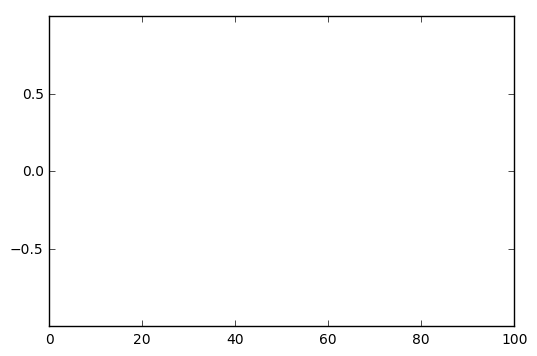

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import animation
%matplotlib inline
 
#Antal punkter i griddet
N = 100
 
#Steds skridtstørrelse
k = 0.07
#Scallerings faktor til delta T for at få simuleringnen til at kører hurtigere
D = 0.1
#Tids skridtstørrelse
dt = 0.02
#Total tid vi løber over
totalTid = 100
 
#Opretter en tom matrice til at indeholde vores løsning
#Denne har dimension total tid/tidsskrid X antal punkter i gridet
U = np.zeros(((int(totalTid/dt)),N))
 
#danner en liste hvor hvert punkt har samme afstand fra værdien -pi til pi med lige så mange punkter som vores grid er langt
x = np.linspace(-np.pi, np.pi, len(U[0]))
 
#indsætter denne i sinus funktionen og sætter den som vores begyndelses betingelse
U[0] = [x,np.sin(x)][1]
 
#her ordner jeg rand betingelser
#sætter første punkt i griddet til 0
U[:,0] = 0
#sætter sidste punkt i griddet til 0
U[:,-1] = 0
 
#løber igennem alle rækker (tid)
for n in range(1,int(U.shape[0])):
    #løbber igennem alle kolloner (sted)
    for i in range(1,int(U.shape[1])-1):
        #Dette er FTCS skemaet skrevet ind i python.
        U[n][i] = U[n-1][i]+((D*dt)/k**2)*(U[n-1][i-1]+U[n-1][i+1]-2*U[n-1][i])
 
#Koden nedenunder animere vores resultat
           
"""
Matplotlib Animation Example
 
author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
 
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, N), ylim=(np.min(U), np.max(U)))
line, = ax.plot([], [], lw=2)
 
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,
 
# animation function.  This is called sequentially
def animate(i):
    x = range(U.shape[1])
    y = U[i]
    line.set_data(x, y)
    return line,
 
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=10, blit=True)
 
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#udkommenter linjen nedunder for at gemme plottet som video fil
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
 
plt.show()

# Nedunder ses plot af varme diffusionen efter N tidsskridt

In [3]:
def plotHeat(number):
    plt.plot(U[number])
    plt.ylim(-1,1)
    plt.title("Varmeledning efter "+ str(number) +" tids skridt")
    plt.ylabel("Varme")
    plt.xlabel("Position")
    plt.show()


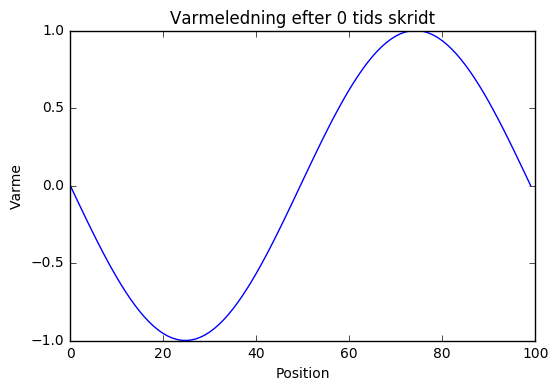

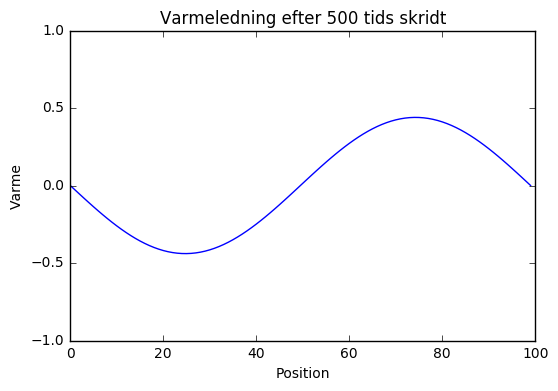

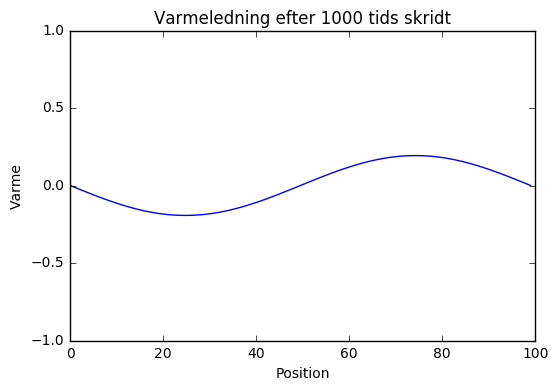

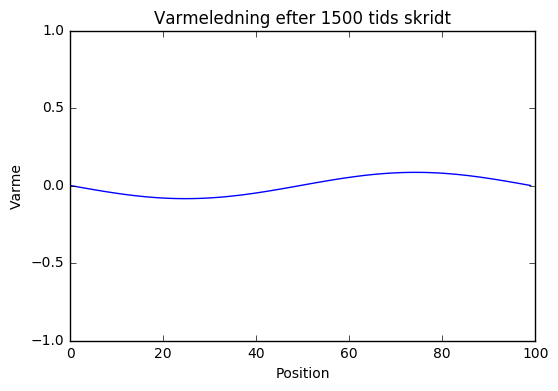

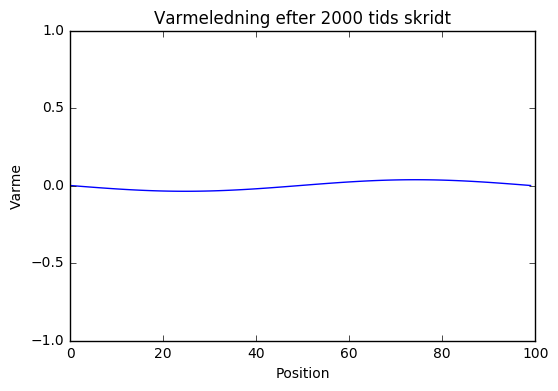

In [4]:
time = [0,500,1000,1500,2000]

for i in time:
    plotHeat(i)